<a href="https://colab.research.google.com/github/andrearica/ray_tracing/blob/master/Ray_Tracing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def free(So):
    mat = [[1, So],
          [0, 1]]
    return mat

In [0]:
def t_lens(f):
    mat = [[1, 0],
          [-1/f, 1]]
    return mat

In [0]:
def th_lens(n1,n2,R):
    mat = [[1,0],
          [(1-(n1/n2))*1/R, n1/n2]]
    return mat

In [0]:
def func(a1,a2):
    m = (a1[1]-a2[1])/(a1[0]-a2[0])
    b = a1[1] - m*a1[0]
    def line_f(xnot):
        return m*xnot+b
    return line_f

In [0]:
###inputs single lens

n = 1.5
nm = 1

#thick lens
R1 = -10
R2 = 15
d = 2

#thin
RoC = 10
f = (n-nm)*(2/RoC)

In [0]:
###inputs dual lens
n1 = 1.5
n2 = 1.5
nm = 1

#thin
f1 = 30.1
f2 = 3
df = f1+f2

R1 = 2*f1*(n1-nm)
R2 = 2*f2*(n2-nm)

#thick
R1L = 10
R1R = -15
d1 = 2

R2L = -10
R2R = 15
d2 = 2

dft = 30

In [0]:
#initial parameters
So = 20
h = 10

In [0]:
def thick(xref,So, hg, R1, R2, d, nm, n1,c):
#thick lens
    z = []
    h = hg
    # a = -0.3
    #for h in np.linspace(0,hg,5)
    for a in [0.5,-0.5,-0.75,-0.20]:
        xs=xref
        plt.axhline(0, color='k', linewidth = 0.5)

        r = [h, a, xs]
        y = np.matmul(free(So),r[:2])
        
        x = np.linspace(xs,xs+So,100)
                
        xs+=So
        r1 = [y[0],y[1],xs]
        
        y = func([r[2],r[0]],[r1[2],r1[0]])(x)
        plt.plot(x,y,c,alpha=0.3)

        plt.axvline(xs, color='k')
        plt.axvline(xs+d, color='k')
        
        y = np.matmul(th_lens(nm,n1,R1),r1[:2])
        r2 = [y[0],y[1],xs]
        

        y = np.matmul(free(d),r2[:2])
        
        x1 = np.linspace(xs,xs+d,100)
                
        xs+=d
        r3 = [y[0],y[1],xs]

        y1 = func([r2[2],r2[0]],[r3[2],r3[0]])(x1)
        plt.plot(x1,y1,c,alpha=0.3)

        y = np.matmul(th_lens(n1,nm,R2),r3[:2])
        r4 = [y[0],y[1],xs]


        #x = np.linspace(xs,xs+So,100)
        #y = func([r[2],r[0]],[r1[2],r1[0]])(x)
        #plt.plot(x,y,'gray')
        
        #xs+=So
        #plt.axvline(xs, color='k')
        #plt.axvline(xs+d, color='k')

        #x1 = np.linspace(xs,xs+d,100)
        #y1 = func([r2[2],r2[0]],[r3[2],r3[0]])(x1)
        #plt.plot(x1,y1,'gray')

        #xs+=d
        
        x2 = np.linspace(xs-50,xs+50,4000)
        y2 = r4[1]*(x2-xs) + r4[0]
        plt.plot(x2,y2,c,alpha = 0.3)

        z.append(y2)
    return z, x2


In [0]:
def thin(xref,So, hg, f, c):
    z = []
    h = hg
    for a in [0.2,-0.3,-0.5]:
        xs=xref
        plt.axhline(0, color='k',linewidth = 0.5)

        r = [h, a, xs]
        y = np.matmul(free(So),r[:2])
        
        x = np.linspace(xs,xs+So,100)
        
        xs+=So
        r1 = [y[0],y[1],xs]
        
        y = func([r[2],r[0]],[r1[2],r1[0]])(x)
        plt.plot(x,y,c, alpha=0.3)
        #print(func([r[2],r[0]],[r1[2],r1[0]])(x))

        plt.axvline(xs, color='k')
        
        y = np.matmul(t_lens(f),r1[:2])
        r2 = [y[0],y[1],xs]     
            
        x2 = np.linspace(xs-100,xs+100,30000)
        y2 = r2[1]*(x2-xs) + r2[0]
        plt.plot(x2,y2,c,alpha=0.3)

        z.append(y2)
    return z, x2

In [0]:
def obj_img(z,x2,c):
    if c == 'g':l = 'image1'
    elif c == 'b': l = 'Final image'
    
    e = 0.01
    inte = False
    i,j = np.shape(z)
    z=np.array(z)
    while inte == False:
        for k in range(j-1):
            #print(abs(z[0,k]-z[1,k]))
            if abs(z[0,k]-z[1,k])<e:
                #print(z[0,k],z[1,k])
                inte = k
                break
        e=0.1

    Si = x2[inte]
    h1 = z[0,inte]
    plt.plot([Si,Si],[h1,0],color = c, label = l)
    return Si, h1

Si = 49.716929232308075 height = -1.808124087461902 Magnification = 0.5024917111186363


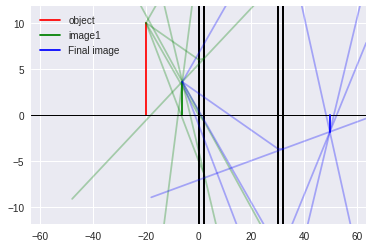

In [24]:
##Two Lenses Plot all thick

plt.plot([-So,-So],[h,0],color = 'r', label = 'object')
z, x2 = thick(-So,So, h, R1L, R1R, d1, nm, n1,'g')
Si, h1 = obj_img(z,x2,'g')

So2 = dft-Si
z, x2 = thick(Si, So2, h1, R2L, R2R, d2, nm, n1,'b')
Si2, h2 = obj_img(z,x2,'b')
plt.legend()

plt.xlim (-So-Si-Si2, Si2+Si+So)
plt.ylim (-(h+h1+h2),h+h2+h1)

print("Si = " +str(Si2), "height = " +str(h2), "Magnification = " +str(abs(h2/h1)))

Si = 36.30344011467048 height = -0.3783818615056873 Magnification = 0.06303403126158791


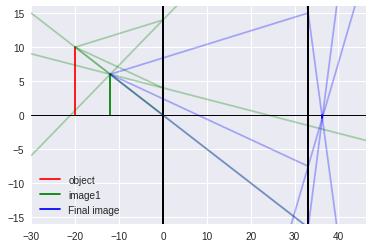

In [23]:
#Two Lenses Thin
plt.plot([-So,-So],[h,0],color = 'r', label = 'object')
z, x2 = thin(-So,So,h,-f1,'g')
Si, h1 = obj_img(z,x2,'g')

So2 = df-Si

z, x2 = thin(Si,So2,h1,f2,'b')
Si2, h2 = obj_img(z,x2,'b')
plt.legend()
plt.xlim (-So-10, Si2+10)
plt.ylim (-(h+h1),h+h1)

print("Si = " +str(Si2), "height = " +str(h2), "Magnification = " +str(abs(h2/h1)))

Si = 48.51662915728933 height = -2.4194403540817433 Magnification = 0.4030507125998788


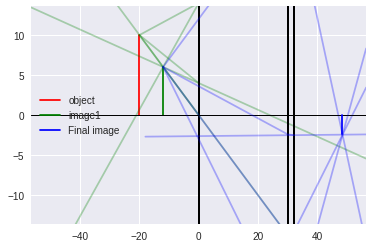

In [25]:
#Two Lenses Mix
plt.plot([-So,-So],[h,0],color = 'r', label = 'object')
z, x2 = thin(-So,So,h,-f1,'g')
Si, h1 = obj_img(z,x2,'g')

So2 = dft-Si

z, x2 = thick(Si, So2, h1, R2L, R2R, d2, nm, n1,'b')
Si2, h2 = obj_img(z,x2,'b')
plt.legend()

plt.xlim (-So-Si-Si2, Si2+Si+So)
plt.ylim (-(h+h1+h2),h+h2+h1)

print("Si = " +str(Si2), "height = " +str(h2), "Magnification = " +str(abs(h2/h1)))

In [0]:
##Single Lens
plt.plot([-So,-So],[h,0],color = 'r', label = 'object')
z, x2 = thin(-So,So,h,-f1,'g')
Si, h1 = obj_img(z,x2,'g')